# Ejecución

Ejemplo de clasificación de una imagen usando técnicas de procesamiento de imágenes.

In [1]:
from image import Image
import matplotlib.pyplot as plt

Cargamos algunas imágenes básicas de prueba para comparar cómo varían sus momentos al variar sus tamaños y posición.

In [2]:
lanceolada = "./testimages/leafs/lanceolada.jpg"
flabelada = "./testimages/leafs/flabelada.jpg"
acumitada = "./testimages/leafs/acumitada.jpg"
orbicular = "./testimages/leafs/orbicular.jpg"
romboide = "./testimages/leafs/romboide.jpg"
ovada = "./testimages/leafs/ovada.jpg"
astada = "./testimages/leafs/astada.jpg"
palmeada = "./testimages/leafs/palmeada.jpg"
sagitada = "./testimages/leafs/sagitada.jpg"

leafs =[lanceolada, flabelada, acumitada, orbicular, romboide, ovada, astada, palmeada, sagitada]


In [3]:
ll = Image()
ll.load_file(flabelada)

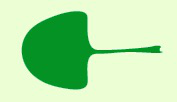

In [4]:
ll.show()

In [5]:
print(ll.hu_moments())

(0.3207811493752293, 0.02452288351987129)


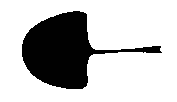

In [6]:
lle = ll
bound = lambda x: 255 if x > 200 else 1
lle.map_over(lambda r, g, b: (bound(g), bound(g), bound(g)))
lle.show()

In [7]:
print(ll.hu_moments())

(0.29768184782794443, 0.021067187247205375)


Realizaremos este proceso para cada una de las imágenes de prueba.

In [8]:
def binarize_(url):
    ll = Image()
    ll.load_file(url)
    ll.map_over(lambda r, g, b: (bound(b), bound(b), bound(b)))
    return ll
    
binary_leafs = map(binarize_, leafs)
hu_moments = list(map(lambda x: x.hu_moments(), binary_leafs))

def get_moments(url):
    im = Image()
    im.load_file(url)
    return ("  "+url.split("/")[3].split(".")[0], im.hu_moments())
  
get_position = lambda x: x[1]


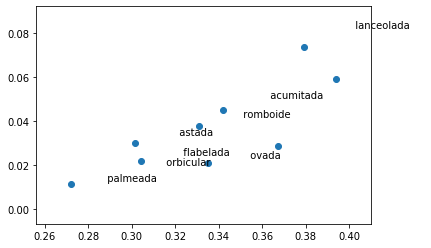

In [9]:
hu_name_moments = list(map(get_moments, leafs))
plt.scatter(*zip(*hu_moments))
for label, moments in hu_name_moments:
    plt.annotate(label, moments)
url, moments = get_moments(leafs[1])
plt.show()

La gráfica nos muestra la disposición de los momentos invariantes para cada imagen, ahora compararemos con una imagen de prueba.

Cargamos la imagen que clasificaremos.

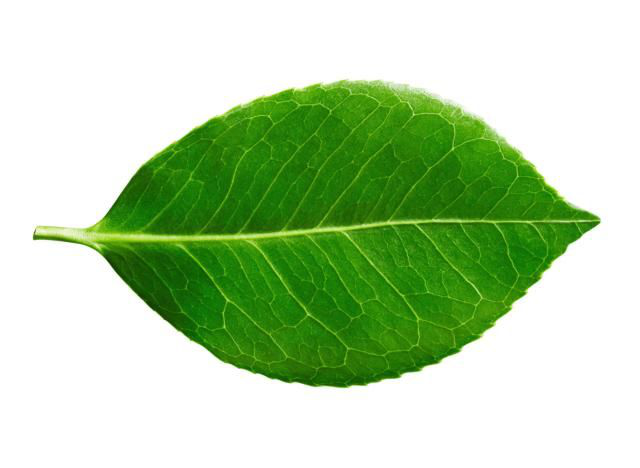

In [10]:
test = "./testimages/leafs/test3.jpg"
testimage = Image()
testimage.load_file(test)

    
testimage.show()


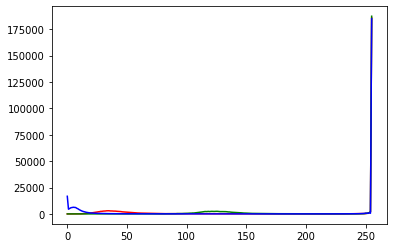

In [11]:
def printhisto(testimage):
    (histr, histg, histb) = testimage.color_histogram()
    plt.plot(histr, 'r')
    plt.plot(histg, 'g')
    plt.plot(histb, 'b')
    plt.show()
printhisto(testimage)


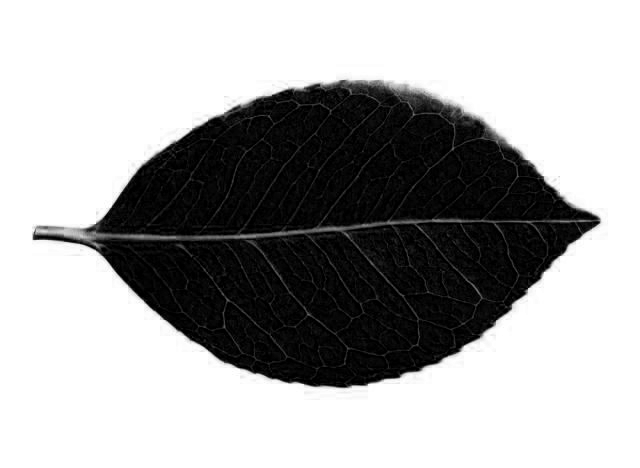

In [12]:
testimage.black_white().show()



Histograma normalizado para la imagen en blanco y negro:


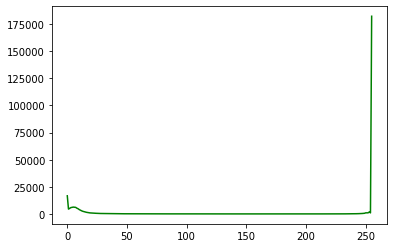

In [13]:
hist_normal = testimage.histogram()
plt.plot(hist_normal, 'g')
plt.show()

Calculamos el valor t que minimiza la varianza.

In [14]:
t = testimage.minimum_otsu()       
print(t)

134


Usamos el valor t obtenido para segmentar la imagen:

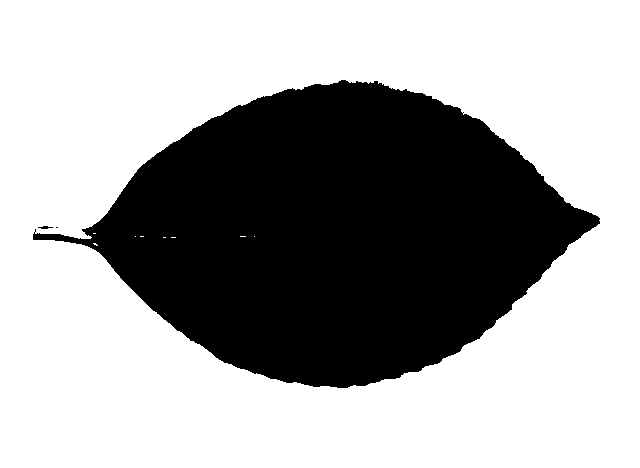

In [15]:
image = testimage.copy()
image.binarize(t).show()

Calculamos los momentos invariantes de Hu para la imagen:

In [16]:
hm = image.hu_moments()
print(hm)

(0.3601956207386796, 0.010512156197008187)


Agregamos la imagen de prueba a la gráfica.

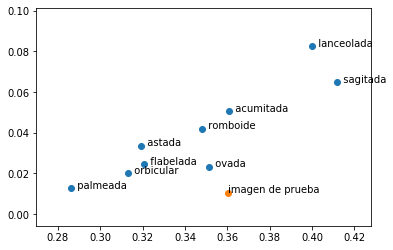

In [17]:
hu_moments = list(map(get_position, hu_name_moments))
tm = ("imagen de prueba", hm)

plt.scatter(*zip(*hu_moments))
for label, moments in hu_name_moments:
    plt.annotate(label, moments)
plt.scatter(*hm)
plt.annotate(*tm)
url, moments = get_moments(leafs[1])
plt.show()

A simple vista, la imagen se encuentra cerca de la forma ovada, que es la forma correcta, sin embargo se encuentra algo alejada del resultado,  con más imágenes de prueba y un mejor preprocesamiento de la imagen se podrían obtener mejores resultados.